In [15]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/car data.csv')

In [ ]:
# Car_Name: Name of the car
# Year: Year of purchase
# Selling_Price: Price at which the car is being sold (in lakhs)
# Present_Price: Current showroom price (in lakhs)
# Kms_Driven: Number of kilometers driven
# Fuel_Type: Fuel type of the car (Petrol, Diesel, CNG)
# Seller_Type: Type of seller (Dealer, Individual)
# Transmission: Transmission type (Manual, Automatic)
# Owner: Number of previous owners

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
data.shape

(301, 9)

In [6]:
# print("Number of Rows",data.shape[0])
# print("Number of Columns",data.shape[1])

Number of Rows 301
Number of Columns 9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [12]:
data.describe()

# This gives insights on numerical features like:

# Average selling price
# Max km driven
# Car age range (from Year)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
data.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [19]:
 #Feature Engineering: Age of the Car
 #Since we have the Year column, let’s compute the age of the car .
current_year = datetime.datetime.now().year
data['Car_Age'] = current_year - data['Year']

In [20]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


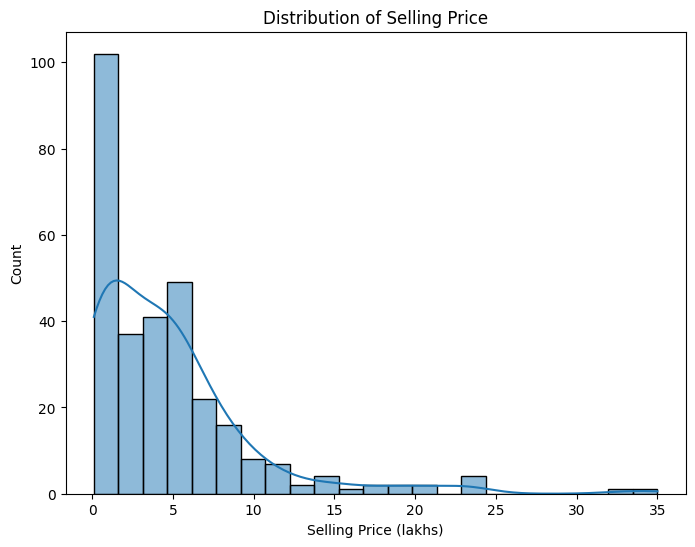

In [23]:
#Distribution of Selling Price
plt.figure(figsize=(8, 6))
sns.histplot(data['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (lakhs)')
plt.ylabel('Count')
plt.show()

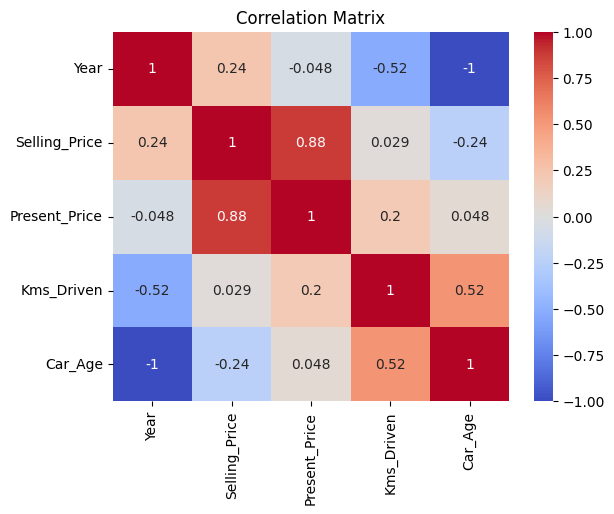

In [25]:
#Correlation Between Numerical Features
numerical_cols = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age']
corr_matrix = data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

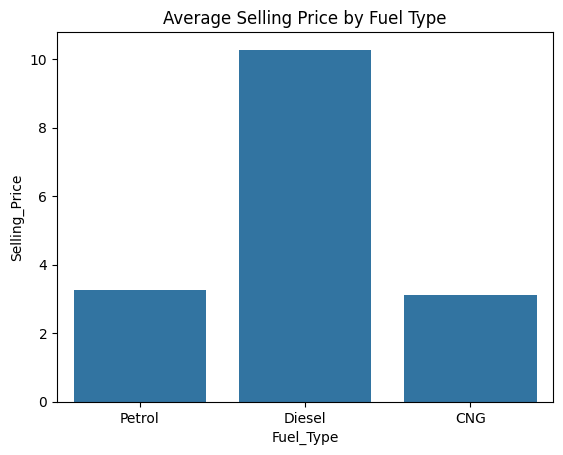

In [26]:
#Categorical Variables Analysis
#Fuel Type vs Selling Price
sns.barplot(x='Fuel_Type', y='Selling_Price', data=data, ci=None)
plt.title('Average Selling Price by Fuel Type')
plt.show()

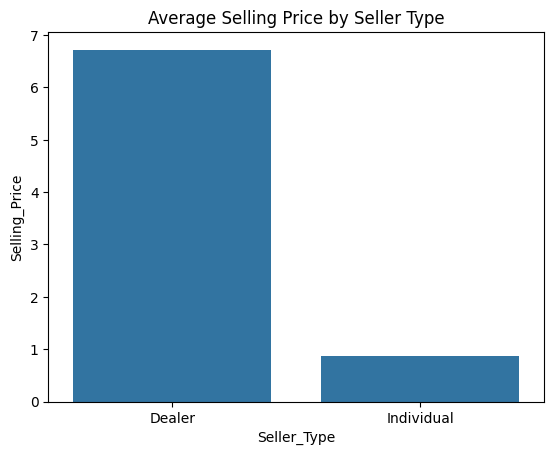

In [27]:
# Seller Type vs Selling Price
sns.barplot(x='Seller_Type', y='Selling_Price', data=data, ci=None)
plt.title('Average Selling Price by Seller Type')
plt.show()

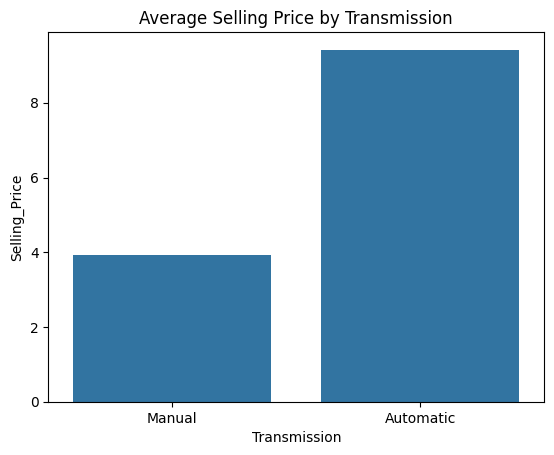

In [28]:
# Transmission Type vs Selling Price

sns.barplot(x='Transmission', y='Selling_Price', data=data, ci=None)
plt.title('Average Selling Price by Transmission')
plt.show()

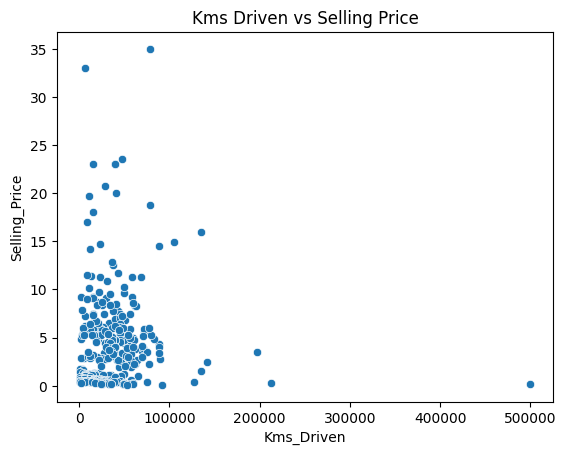

In [29]:
#Kms Driven vs Selling Price
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=data)
plt.title('Kms Driven vs Selling Price')
plt.show()

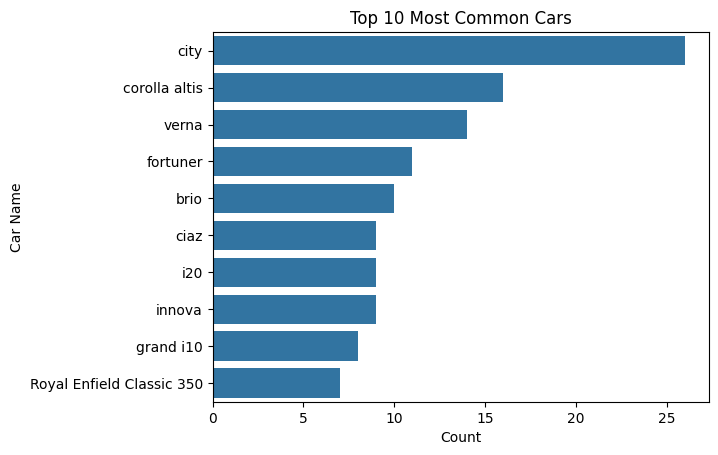

In [30]:
#10. Top N Most Common Cars
top_cars = data['Car_Name'].value_counts().head(10)
sns.barplot(x=top_cars.values, y=top_cars.index)
plt.title('Top 10 Most Common Cars')
plt.xlabel('Count')
plt.ylabel('Car Name')
plt.show()

In [47]:
data.drop('Year',axis=1,inplace=True)

<Axes: ylabel='Selling_Price'>

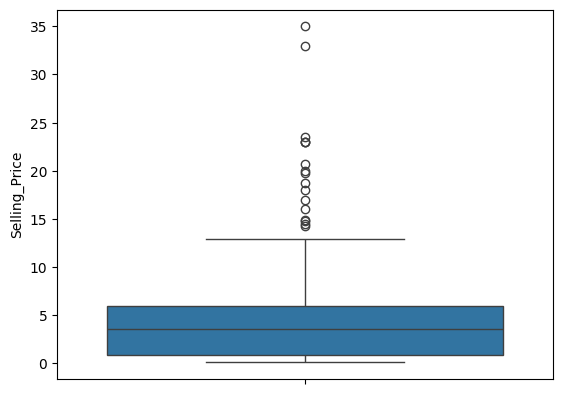

In [31]:
import seaborn as sns
sns.boxplot(data['Selling_Price'])

In [33]:
#sorted(data['Selling_Price'],reverse=True)

In [34]:
data = data[~(data['Selling_Price']>=33.0) & (data['Selling_Price']<=35.0)]

In [35]:
data.shape

(299, 10)

In [36]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [37]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [38]:
data['Fuel_Type'].unique()

array([0, 1, 2])

In [39]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [40]:
data['Seller_Type'] = data['Seller_Type'].map({'Dealer':0,'Individual':1})

In [41]:
data['Seller_Type'].unique()

array([0, 1])

In [42]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [43]:
data['Transmission'] =data['Transmission'].map({'Manual':0,'Automatic':1})

In [44]:
data['Transmission'].unique()

array([0, 1])

In [45]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,11
1,sx4,2013,4.75,9.54,43000,1,0,0,0,12
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,8
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,14
4,swift,2014,4.60,6.87,42450,1,0,0,0,11


In [49]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
y = data['Selling_Price']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1.5992905987044932
R2 Score: 0.6790884983129406


In [ ]:
# 1. MAE: 1.599
# معنى القيمة:
# متوسط الخطأ المطلق بين القيم المتوقعة والقيم الفعلية.

# بمعنى آخر:

# النموذج يخطئ في التنبؤ بسعر البيع بمعدل 1.6 لakh (60,000 روبية هندية تقريباً) لكل سيارة.

# تقييم القيمة:
# إذا كان نطاق Selling_Price يتراوح مثلاً من 2 إلى 10 لakh، فإن خطأ 1.6 يعتبر مقبولًا نسبيًا لكن يمكن تحسينه.
# كلما قلّت قيمة MAE، كان الأداء أفضل.
# 2. R² = 0.679
# معنى القيمة:
# مربع معامل التحديد (R-squared) يوضح كم نسبة التباين في متغير Selling_Price يتم شرحه بواسطة النموذج.

# هذا يعني أن النموذج يفسر حوالي 67.9% من التباين في أسعار السيارات.

In [ ]:
# تقييم القيمة:
# 1
# النموذج يتنبأ بشكل مثالي
# 0.7 - 1
# جيد جداً
# 0.5 - 0.7
# جيد، لكن هناك مجال للتحسين
# < 0.5
# ضعيف، يحتاج إلى تحسين

In [54]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1.0679916666666676
R2 Score: 0.7518234026596293


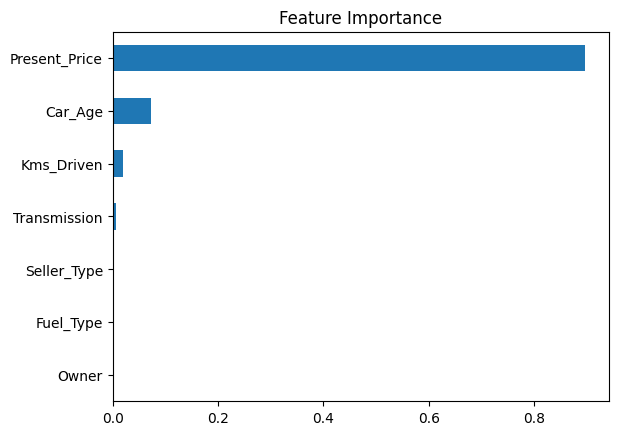

In [55]:
#Feature Importance:
# لمعرفة أي المتغيرات لها أكبر تأثير على سعر البيع:
import pandas as pd

features = pd.Series(model.feature_importances_, index=X.columns)
features.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()

In [57]:
# Model 3: XGBoost Regressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [59]:
# --------------------------
# Step 3: Evaluate All Models
# --------------------------

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"  MAE: {mae:.4f}")
    print(f"  R2 Score: {r2:.4f}\n")
    return mae, r2


evaluate_model(y_test, y_pred_xgb, "XGBoost")

XGBoost Performance:
  MAE: 0.8242
  R2 Score: 0.8887



(0.8241719318926334, 0.8887471822279068)

In [ ]:
#  1. MAE = 0.8242 (Mean Absolute Error)
# ✅ ماذا يعني؟
# هو متوسط الخطأ المطلق بين القيم المتوقعة والقيم الحقيقية.
# بمعنى آخر: في المتوسط، يخطئ النموذج بمقدار 0.82 لاخ (Lakh) في التنبؤ بسعر البيع.
# 1 لاخ = 100,000 روبية هندية تقريبًا → إذًا الخطأ حوالي 82,000 روبية لكل سيارة.
# 💡 هل هذا جيد؟
# < 0.5
# ممتاز
# 0.5 - 1.0
# جيد جداً
# 1.0 - 1.5
# جيد
# > 1.5
# يحتاج تحسين
# ➡️ إذن: أداء XGBoost جيد جداً

# 🔍 2. R² = 0.8887 (R-Squared)
# ✅ ماذا يعني؟
# هو نسبة التباين في متغير Selling_Price الذي يمكن شرحه باستخدام النموذج.
# R² = 0.8887 تعني أن 88.87% من التغييرات في سعر البيع يمكن تفسيرها بواسطة النموذج .

In [ ]:
# > 0.9
# ممتاز
# 0.8 - 0.9
# جيد جداً
# 0.7 - 0.8
# جيد
# < 0.7
# يحتاج تحسين

In [ ]:
# XGBoost هو نموذج تدريجي (Gradient Boosting) يستخدم أشجار قرار (Decision Trees).
# يتعامل بشكل ممتاز مع:
# العلاقات غير الخطية
# البيانات العددية والفئوية
# الضوضاء (Noise)
# كما أنه يدعم Regularization مما يقلل من خطر الإفراط في التعلم (Overfitting).

In [60]:
# --------------------------
# Step 4: Hyperparameter Tuning (Optional for RF)
# --------------------------

#Improve Random Forest with RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 6),
    'max_features': ['sqrt', 'log2']
}

rf_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest")

Tuned Random Forest Performance:
  MAE: 0.8176
  R2 Score: 0.8863



(0.8176196078431367, 0.886305574513922)

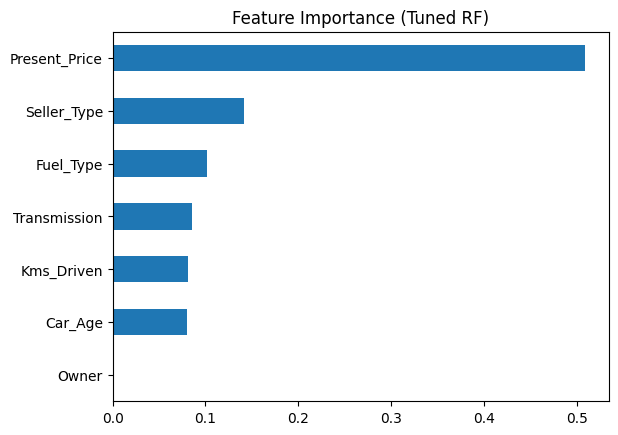

In [61]:
# --------------------------
# Step 5: Feature Importance (for Best Model)
# --------------------------

features = pd.Series(best_rf.feature_importances_, index=X.columns)
features.sort_values().plot(kind='barh', title='Feature Importance (Tuned RF)')
plt.show()

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)

GradientBoostingRegressor()

In [65]:
y_pred3 = xgb.predict(X_test)

In [66]:
from sklearn import metrics

In [67]:
score3 = metrics.r2_score(y_test,y_pred3)

In [68]:
print(score3)

0.8825404168697902
